In [52]:
#%pip install pyreadstat

In [53]:
%pip install seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
import pyreadstat
import pandas as pd

data_hogar, metadata_hogar = pyreadstat.read_sav("ENCOVI_Hogar.sav")
df_H = pd.DataFrame(data_hogar)

print(df_H.head())


   REGION  DEPTO  AREA  UPM  NUMHOG  FACTOR  FACTOR3  POBREZA  THOGAR  PPB01  \
0     1.0    1.0   1.0  1.0     1.0   525.0   1575.0      3.0     3.0    2.0   
1     1.0    1.0   1.0  1.0     2.0   525.0   1575.0      3.0     3.0    2.0   
2     1.0    1.0   1.0  1.0     3.0   525.0   9450.0      2.0    18.0    2.0   
3     1.0    1.0   1.0  1.0     4.0   525.0   3150.0      2.0     6.0    2.0   
4     1.0    1.0   1.0  1.0     5.0   525.0   1575.0      3.0     3.0    2.0   

   ...  P01H10  P01H11  P01H12  P01H13  P01H14  P01H15  P01H16  DIA_ENC  \
0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN     22.0   
1  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN     27.0   
2  ...     1.0     1.0     1.0     1.0     1.0     1.0     1.0     22.0   
3  ...     2.0     2.0     2.0     2.0     2.0     2.0     2.0     24.0   
4  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN     22.0   

   MES_ENC   A_ENC  
0      8.0  2014.0  
1      8.0  2014.0  
2    

In [55]:
data_personas, metadata_personas = pyreadstat.read_sav("ENCOVI_Personas.sav")
df_P = pd.DataFrame(data_personas)
print(df_P.head())

   REGION  DEPTO  AREA  UPM  NUMHOG  FACTOR  POBREZA  THOGAR   ID  PPA02  ...  \
0     1.0    1.0   1.0  1.0     1.0   525.0      3.0     3.0  1.0    1.0  ...   
1     1.0    1.0   1.0  1.0     1.0   525.0      3.0     3.0  2.0    2.0  ...   
2     1.0    1.0   1.0  1.0     1.0   525.0      3.0     3.0  3.0    2.0  ...   
3     1.0    1.0   1.0  1.0     2.0   525.0      3.0     3.0  1.0    2.0  ...   
4     1.0    1.0   1.0  1.0     2.0   525.0      3.0     3.0  2.0    1.0  ...   

   P11A10A  P11A10B  P11B01A  P11B01B  P11B02A  P11B02B  P11B03A  P11B03B  \
0      2.0      NaN      2.0      NaN      2.0      NaN      2.0      NaN   
1      2.0      NaN      2.0      NaN      2.0      NaN      2.0      NaN   
2      2.0      NaN      2.0      NaN      2.0      NaN      2.0      NaN   
3      2.0      NaN      2.0      NaN      2.0      NaN      2.0      NaN   
4      2.0      NaN      2.0      NaN      2.0      NaN      2.0      NaN   

   P11B04A  P11B04B  
0      2.0      NaN  
1     

## Limpieza de datos
Vamos primero a observar si hay datos faltantes en los datasets y haremos uso del diccionario adjunto al mismo para saber y poder determinar cuales son las variables que utilizaremos para analizar y entrenar nuestro modelo.Luego de este proceso obtuvimos lo siguiente <br>
#### Variables para dataset Hogar
* Pobreza
* Region
* Departamento
* Area
* Thogar
* PPB01 - PPB04
* PPA11A
* PPA11B
* P01A01 - P01A04
* P01A05A
* P01A05C
* P01A06
* P01D01
* P01D03
* P01D07
* P01D08
* P01D18
* MES_ENC
* A_ENC
#### Variables para dataset Personas
* Pobreza
* Region
* Departamento
* Area
* Thogar
* PPA02
* PPA03
* PPA06

In [56]:
columnas_deseadas_df_H = ['POBREZA', 'REGION', 'DEPTO', 'AREA', 'THOGAR', 'PPB01', 'PPB02', 'PPB03', 'PPB04', 'PPA11A', 'P01A01', 'P01A02', 'P01A03', 'P01A04', 'P01A05A', 'P01A05C', 'P01A06', 'P01D01', 'P01D03', 'P01D08', 'MES_ENC', 'A_ENC']
df_H = df_H[columnas_deseadas_df_H]

columnas_deseadas_df_P = ['POBREZA', 'REGION', 'DEPTO', 'AREA', 'THOGAR', 'PPA02', 'PPA03', 'PPA06']
df_P = df_P[columnas_deseadas_df_P]

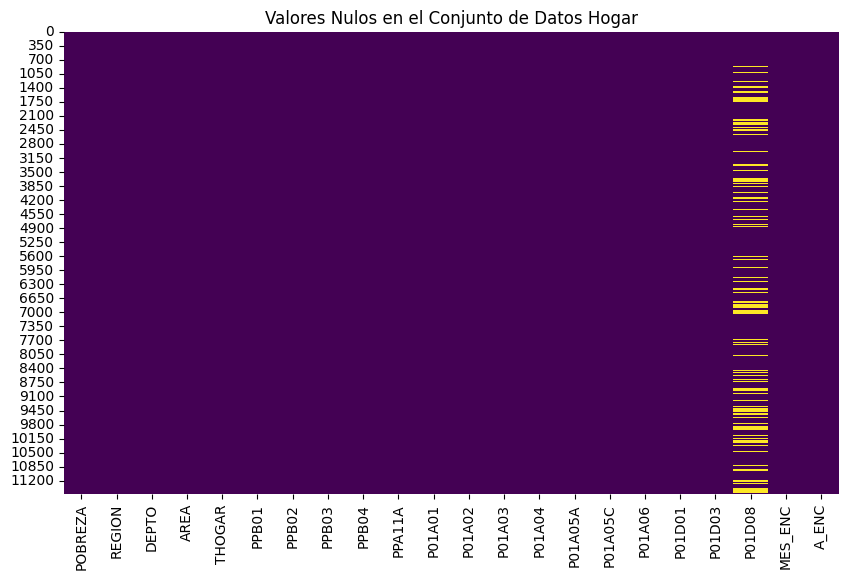

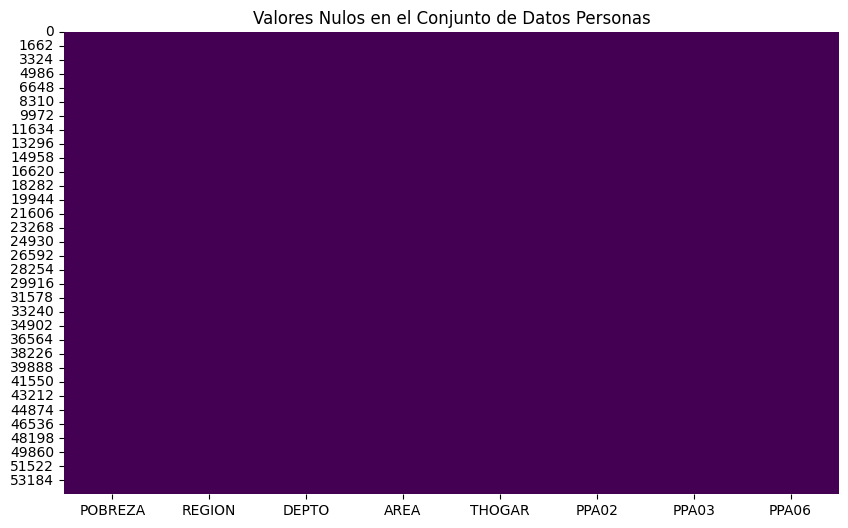

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un mapa de calor de valores nulos
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura
sns.heatmap(df_H.isnull(), cbar=False, cmap='viridis')  # cmap define el esquema de color
plt.title('Valores Nulos en el Conjunto de Datos Hogar')
plt.show()

# Crear un mapa de calor de valores nulos
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura
sns.heatmap(df_P.isnull(), cbar=False, cmap='viridis')  # cmap define el esquema de color
plt.title('Valores Nulos en el Conjunto de Datos Personas')
plt.show()


Podemos ver que aun tenemos algunos datos vacios en nuestro set de datos en la columna correspondiente a P01D08 la